In [1]:
!mkdir models10

In [2]:
!ls

models
models10
models2
models3
models4
models5
models6
models7
RNN_LSTM_Keras_working_35epo_selected.ipynb
RNN_LSTM_Keras_working_50_epo_adam.ipynb
RNN_LSTM_Keras_working_50_epo_selected.ipynb
RNN_LSTM_Keras_working.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_Momentum_32B.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_Momentum-Copy1.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_Momentum_redo.ipynb
RNN_LSTM_Keras_working-just_for_50ep_SGD_No_Momentum.ipynb
RNN_LSTM_Keras_working-just_for_SGD_Momentum.ipynb


In [1]:
%matplotlib inline

from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras import optimizers

from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed, LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def img_resize(org_imgs, target_size):
  x_imgs = []
  for i in range(0,org_imgs.shape[0]):
    x_img = cv2.resize(org_imgs[i], dsize=(target_size, target_size), interpolation=cv2.INTER_CUBIC)
    x_imgs.append(x_img)
  return np.array(x_imgs)


def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()
    
    
# Training parameters.
batch_sizes = [64,128]
num_epochs = [50]
learning_rates = [0.01,0.05]
optimizers_name = ['sgd']
num_classes = 10
node_sizes = [128]

# The data, shuffled and split between train and test sets.
(images, labels), (_, _) = fashion_mnist.load_data()

images_zoomed_in = img_resize(images, 48)
images_zoomed_in = images_zoomed_in.reshape(images_zoomed_in.shape[0], images_zoomed_in.shape[1], images_zoomed_in.shape[2], 1).astype('float32')

x_train = images_zoomed_in[0:50000]
x_test = images_zoomed_in[50000:60000]

y_train = labels[0:50000]
y_test = labels[50000:60000]


# x_train -= np.mean(x_train)
# x_test -= np.mean(x_train)

# x_train /= np.std(x_train)
# x_test /= np.std(x_train)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


TRAIN_DATA_SIZE = x_train.shape[0]
TEST_DATA_SIZE = x_test.shape[0]

#TRAIN_BATCH_SIZE = 20
#TEST_BATCH_SIZE = 10

#train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
#test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)


# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_gen.fit(x_train)
#train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen.fit(x_train)
#test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

#row, col, pixel = x_train.shape[1:]


best_model = None
best_accuracy = 0
best_batch_size = 0
best_epochs = 0
best_optimizer = ''
best_learning_rate = 0
best_node_size = 0

/home/ryantsan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 48, 48, 1)
50000 train samples
10000 test samples


batch size    : 64
epochs        : 50
optimizer     : sgd
learning rate : 0.01
node size     : 128
Epoch 1/50
781/781 [==============================] - 94s 120ms/step - loss: 1.3289 - acc: 0.4897 - val_loss: 0.8094 - val_acc: 0.6989

Epoch 00001: val_loss improved from inf to 0.80941, saving model to models10/rnn_lstm.h5
Epoch 2/50
781/781 [==============================] - 92s 118ms/step - loss: 0.6510 - acc: 0.7674 - val_loss: 0.5444 - val_acc: 0.8049

Epoch 00002: val_loss improved from 0.80941 to 0.54438, saving model to models10/rnn_lstm.h5
Epoch 3/50
781/781 [==============================] - 92s 118ms/step - loss: 0.5699 - acc: 0.7982 - val_loss: 0.7180 - val_acc: 0.7463

Epoch 00003: val_loss did not improve from 0.54438
Epoch 4/50
781/781 [==============================] - 92s 118ms/step - loss: 0.4967 - acc: 0.8211 - val_loss: 0.4782 - val_acc: 0.8240

Epoch 00004: val_loss improved from 0.54438 to 0.47816, saving model to models10/rnn_lstm.h5
Epoch 5/50
781/781 [===========

781/781 [==============================] - 92s 117ms/step - loss: 0.1812 - acc: 0.9316 - val_loss: 0.2888 - val_acc: 0.8976

Epoch 00040: val_loss did not improve from 0.27614
Epoch 41/50
781/781 [==============================] - 92s 117ms/step - loss: 0.1828 - acc: 0.9309 - val_loss: 0.2763 - val_acc: 0.9032

Epoch 00041: val_loss did not improve from 0.27614
Epoch 42/50
781/781 [==============================] - 92s 117ms/step - loss: 0.1762 - acc: 0.9339 - val_loss: 0.2833 - val_acc: 0.9014

Epoch 00042: val_loss did not improve from 0.27614
Epoch 43/50
781/781 [==============================] - 92s 117ms/step - loss: 0.1705 - acc: 0.9372 - val_loss: 0.2766 - val_acc: 0.9011

Epoch 00043: val_loss did not improve from 0.27614
Epoch 44/50
781/781 [==============================] - 92s 117ms/step - loss: 0.1650 - acc: 0.9379 - val_loss: 0.2822 - val_acc: 0.9013

Epoch 00044: val_loss did not improve from 0.27614
Epoch 45/50
781/781 [==============================] - 92s 117ms/step - 

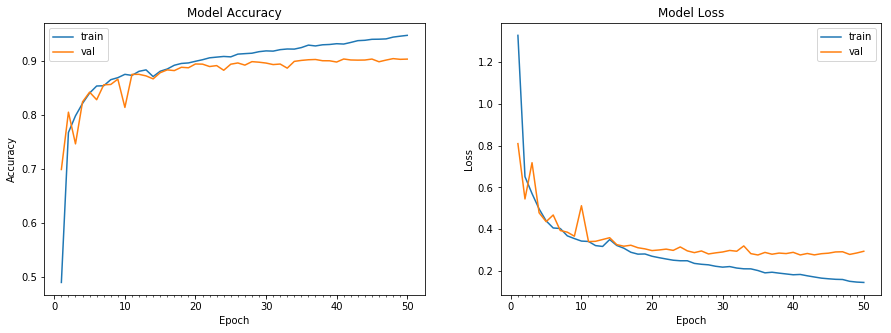

batch size    : 64
epochs        : 50
optimizer     : sgd
learning rate : 0.05
node size     : 128
Epoch 1/50
781/781 [==============================] - 93s 119ms/step - loss: 1.9108 - acc: 0.2630 - val_loss: 2.3152 - val_acc: 0.0996

Epoch 00001: val_loss improved from inf to 2.31519, saving model to models10/rnn_lstm.h5
Epoch 2/50
781/781 [==============================] - 92s 118ms/step - loss: 2.3092 - acc: 0.1010 - val_loss: 2.3068 - val_acc: 0.0956

Epoch 00002: val_loss improved from 2.31519 to 2.30679, saving model to models10/rnn_lstm.h5
Epoch 3/50
781/781 [==============================] - 94s 120ms/step - loss: 2.3071 - acc: 0.1017 - val_loss: 2.3034 - val_acc: 0.1009

Epoch 00003: val_loss improved from 2.30679 to 2.30341, saving model to models10/rnn_lstm.h5
Epoch 4/50
781/781 [==============================] - 95s 122ms/step - loss: 2.3062 - acc: 0.0997 - val_loss: 2.3088 - val_acc: 0.0970

Epoch 00004: val_loss did not improve from 2.30341
Epoch 5/50
781/781 [===========

781/781 [==============================] - 92s 118ms/step - loss: 2.3059 - acc: 0.1002 - val_loss: 2.3051 - val_acc: 0.0970

Epoch 00043: val_loss did not improve from 2.30297
Epoch 44/50
781/781 [==============================] - 92s 118ms/step - loss: 2.3058 - acc: 0.0992 - val_loss: 2.3066 - val_acc: 0.1023

Epoch 00044: val_loss did not improve from 2.30297
Epoch 45/50
781/781 [==============================] - 92s 118ms/step - loss: 2.3060 - acc: 0.0991 - val_loss: 2.3064 - val_acc: 0.0956

Epoch 00045: val_loss did not improve from 2.30297
Epoch 46/50
781/781 [==============================] - 92s 117ms/step - loss: 2.3060 - acc: 0.1012 - val_loss: 2.3042 - val_acc: 0.0987

Epoch 00046: val_loss did not improve from 2.30297
Epoch 47/50
781/781 [==============================] - 93s 118ms/step - loss: 2.3057 - acc: 0.1009 - val_loss: 2.3062 - val_acc: 0.0970

Epoch 00047: val_loss did not improve from 2.30297
Epoch 48/50
781/781 [==============================] - 92s 118ms/step - 

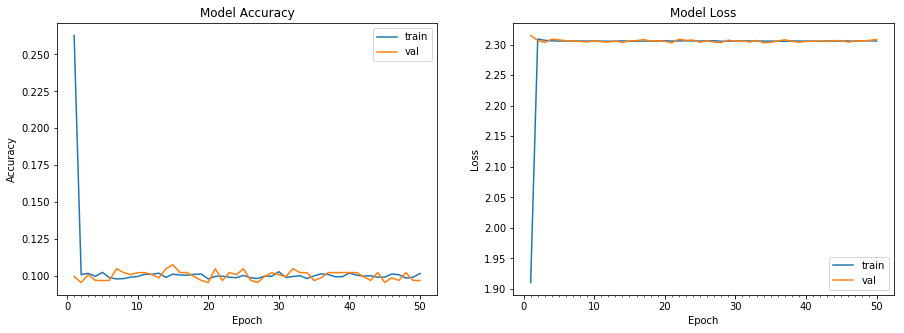

batch size    : 128
epochs        : 50
optimizer     : sgd
learning rate : 0.01
node size     : 128
Epoch 1/50
390/390 [==============================] - 75s 192ms/step - loss: 1.5749 - acc: 0.3984 - val_loss: 1.0265 - val_acc: 0.6072

Epoch 00001: val_loss improved from inf to 1.02648, saving model to models10/rnn_lstm.h5
Epoch 2/50
390/390 [==============================] - 74s 190ms/step - loss: 0.8150 - acc: 0.7003 - val_loss: 0.7245 - val_acc: 0.7436

Epoch 00002: val_loss improved from 1.02648 to 0.72451, saving model to models10/rnn_lstm.h5
Epoch 3/50
390/390 [==============================] - 75s 192ms/step - loss: 0.5827 - acc: 0.7890 - val_loss: 0.5106 - val_acc: 0.8181

Epoch 00003: val_loss improved from 0.72451 to 0.51064, saving model to models10/rnn_lstm.h5
Epoch 4/50
390/390 [==============================] - 74s 189ms/step - loss: 0.4849 - acc: 0.8245 - val_loss: 0.4402 - val_acc: 0.8419

Epoch 00004: val_loss improved from 0.51064 to 0.44021, saving model to models10/


Epoch 00038: val_loss improved from 0.26534 to 0.26221, saving model to models10/rnn_lstm.h5
Epoch 39/50
390/390 [==============================] - 74s 191ms/step - loss: 0.2038 - acc: 0.9245 - val_loss: 0.2716 - val_acc: 0.9005

Epoch 00039: val_loss did not improve from 0.26221
Epoch 40/50
390/390 [==============================] - 74s 191ms/step - loss: 0.2025 - acc: 0.9247 - val_loss: 0.2638 - val_acc: 0.9061

Epoch 00040: val_loss did not improve from 0.26221
Epoch 41/50
390/390 [==============================] - 74s 191ms/step - loss: 0.1932 - acc: 0.9281 - val_loss: 0.2591 - val_acc: 0.9037

Epoch 00041: val_loss improved from 0.26221 to 0.25910, saving model to models10/rnn_lstm.h5
Epoch 42/50
390/390 [==============================] - 74s 191ms/step - loss: 0.1919 - acc: 0.9287 - val_loss: 0.2644 - val_acc: 0.9028

Epoch 00042: val_loss did not improve from 0.25910
Epoch 43/50
390/390 [==============================] - 74s 191ms/step - loss: 0.1928 - acc: 0.9288 - val_loss: 0

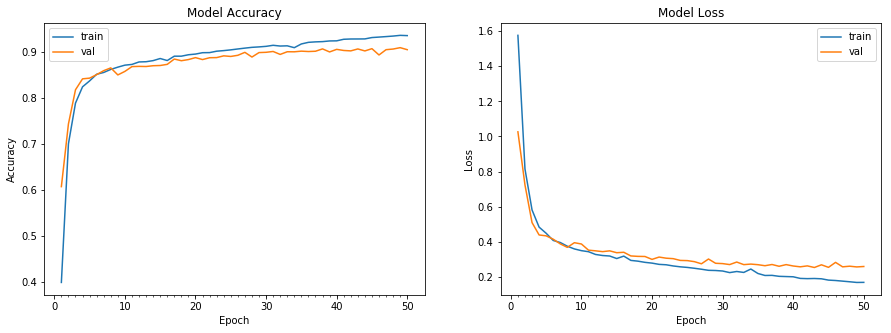

batch size    : 128
epochs        : 50
optimizer     : sgd
learning rate : 0.05
node size     : 128
Epoch 1/50
390/390 [==============================] - 75s 193ms/step - loss: 1.1223 - acc: 0.5729 - val_loss: 0.6388 - val_acc: 0.7594

Epoch 00001: val_loss improved from inf to 0.63879, saving model to models10/rnn_lstm.h5
Epoch 2/50
390/390 [==============================] - 74s 191ms/step - loss: 0.5655 - acc: 0.7952 - val_loss: 0.5208 - val_acc: 0.8117

Epoch 00002: val_loss improved from 0.63879 to 0.52077, saving model to models10/rnn_lstm.h5
Epoch 3/50
390/390 [==============================] - 74s 190ms/step - loss: 0.4501 - acc: 0.8375 - val_loss: 0.4861 - val_acc: 0.8161

Epoch 00003: val_loss improved from 0.52077 to 0.48612, saving model to models10/rnn_lstm.h5
Epoch 4/50
390/390 [==============================] - 74s 191ms/step - loss: 0.6155 - acc: 0.7813 - val_loss: 0.6177 - val_acc: 0.7833

Epoch 00004: val_loss did not improve from 0.48612
Epoch 5/50
390/390 [==========

390/390 [==============================] - 74s 189ms/step - loss: 0.1430 - acc: 0.9456 - val_loss: 0.2642 - val_acc: 0.9098

Epoch 00040: val_loss did not improve from 0.25461
Epoch 41/50
390/390 [==============================] - 74s 189ms/step - loss: 0.1334 - acc: 0.9496 - val_loss: 0.2567 - val_acc: 0.9150

Epoch 00041: val_loss did not improve from 0.25461
Epoch 42/50
390/390 [==============================] - 74s 189ms/step - loss: 0.1281 - acc: 0.9520 - val_loss: 0.2749 - val_acc: 0.9097

Epoch 00042: val_loss did not improve from 0.25461
Epoch 43/50
390/390 [==============================] - 73s 188ms/step - loss: 0.1279 - acc: 0.9525 - val_loss: 0.2735 - val_acc: 0.9066

Epoch 00043: val_loss did not improve from 0.25461
Epoch 44/50
390/390 [==============================] - 73s 188ms/step - loss: 0.1291 - acc: 0.9516 - val_loss: 0.2800 - val_acc: 0.9086

Epoch 00044: val_loss did not improve from 0.25461
Epoch 45/50
390/390 [==============================] - 73s 188ms/step - 

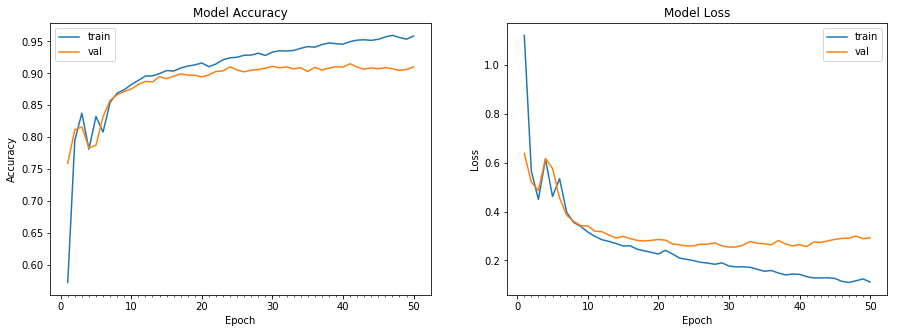

In [2]:
for batch_size in batch_sizes:
  for epochs in num_epochs:
    for optimizer_name in optimizers_name:
      for learning_rate in learning_rates:
        for node_size in node_sizes:
            print("==================")
            print("batch size    : {}".format(batch_size))
            print("epochs        : {}".format(epochs))
            print("optimizer     : {}".format(optimizer_name))
            print("learning rate : {}".format(learning_rate))
            print("node size     : {}".format(node_size))

            if optimizer_name == 'adam':
              optimizer = optimizers.Adam(lr=learning_rate)
            elif optimizer_name == 'rmsprop':
              optimizer = optimizers.RMSprop(lr=learning_rate)
            elif optimizer_name == 'sgd':
              optimizer = optimizers.SGD(lr=learning_rate, momentum=0.9,nesterov=True)

            # Embedding dimensions.
            row_hidden = node_size
            col_hidden = node_size

            
            TRAIN_BATCH_SIZE = batch_size
            TEST_BATCH_SIZE = (batch_size)
            TEST_BATCH_SIZE
            
            train_step = int(TRAIN_DATA_SIZE/TRAIN_BATCH_SIZE)
            test_step = int(TEST_DATA_SIZE/TEST_BATCH_SIZE)
            
            train_batches = train_gen.flow(x_train, y_train, batch_size=TRAIN_BATCH_SIZE, shuffle=False, seed=10)

            test_batches = test_gen.flow(x_test, y_test, batch_size=TEST_BATCH_SIZE, shuffle=False, seed=10)

            row, col, pixel = x_train.shape[1:]
            
            
            # 4D input.
            x = Input(shape=(row, col, pixel))

            # Encodes a row of pixels using TimeDistributed Wrapper.
            encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

            # Encodes columns of encoded rows.
            encoded_columns = LSTM(col_hidden)(encoded_rows)

            # Final predictions and model.
            prediction = Dense(num_classes, activation='softmax')(encoded_columns)

            model = Model(x, prediction)
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

            


            # Training.
            # model.fit(x_train, y_train,
            #           batch_size=batch_size,
            #           epochs=epochs,
            #           verbose=1,
            #           validation_data=(x_test, y_test))
            model_file_name = "models10/rnn_lstm_{}_{}_{}NMom_{}_{}.h5" . format(batch_size, epochs, optimizer_name, learning_rate, node_size)
            checkpoint = ModelCheckpoint(model_file_name, monitor='val_loss', verbose=0, save_best_only= True, mode='auto')

            best_model_file_name = "models10/rnn_lstm.h5"
            best_checkpoint = ModelCheckpoint(best_model_file_name, monitor='val_loss', verbose=1, save_best_only= True, mode='auto')
       
            h = model.fit_generator(train_batches, steps_per_epoch=train_step, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], validation_steps=test_step, epochs=epochs, verbose=1)
            #h = model.fit_generator(train_batches, validation_data=test_batches, callbacks=[checkpoint, best_checkpoint], verbose=1)
  
            plot_model(h)

In [ ]:
from google.colab import files

print(best_model)
print("Best Stats")
print("==========")
print("accuracy      : {}".format(best_accuracy))
print("batch size    : {}".format(best_batch_size))
print("epochs        : {}".format(best_epochs))
print("optimizer     : {}".format(best_optimizer))
print("learning rate : {}".format(best_learning_rate))
print("node size     : {}".format(best_node_size))

filepath = "models/rnn_lstm_best.h5"
files.download(filepath)